# Chapter 3.3 - Solving Friends & Enemy and Antenna Selection Problems Using Qbin

In this chapter we will expand on use of *Qbin* operations and operators in solving particular problem, such as "Extended Friends and Enemies", expanding on the problem solved using *Qbit*-s in chapter 3.1. Also, we are going to look how to use *Qbin* variables to solve some of the vertices and antenna interference problems. Like in previous chapters in this section, we will use the D-Wave quantum computer to solve quantum code with the high complexity.

First we are going to ensure that a default quantum solver is active.

In [1]:
from dann5.dwave import Solver 
print(Solver.Active())

## Solving the Extended Friends and Enemies problem

Expanding on the problem in the chapter 1 where we solved for 2 tribes of friends and enemies, we can use a Qbin variables to identify combinations of more tribes.

How do we write a program using Qbin variables that finds a solution in which more than two enemy tribes?

First, we will see how to define friends and enemy relationships. In the chapter 1 example we had the following rules:

> 1. *xaviar* and *yolanda* are friends, and enemies to others
>
> 2. *zeke* and *wanda* are friends, and enemies to others

For a moment let look how to solve the problem if we are to encode the tribe using Qbin variables with two q-bits, as stated in the following code cell, i.e. *xaviar, yolanda, zeke* and *wanda* are represented with *x, y, z* and *w* Qbin variables with two q-bits, respectfully, and initialized as *unknow* (with q-bits are in superposition state).

In [7]:
from dann5.d5 import Qbin
x = Qbin(2, "xaviar"); y = Qbin(2, "yolanda"); z = Qbin(2, "zeke"); w = Qbin(2, "wanda"); 
print(x, y, z, w)

xaviar\2q:U\ yolanda\2q:U\ zeke\2q:U\ wanda\2q:U\


To describe the above two rules, we will start with the same quantum expression as in chapter 1. However, we will use a deterministic Qbin variable names *_3* with value *0b11 (3)* as an assignee in the definition of the quantum assignment to ensure that friends are encoded with the same value, i.e. ensuring that both of their q-bits have to be the same.

In [8]:
_3 = Qbin("_3", Bits(0b11));

assignFnE = _3._(x.alike(y) & y.unlike(z) & z.alike(w))
print(assignFnE)

from dann5.d5 import Qbinder
varBind = Qbinder() << x << y << z << w
varBind.add(assignFnE.compute())
print(varBind)

_3\2q:11\ = (((xaviar\2q:U\ !^ yolanda\2q:U\) & (yolanda\2q:U\ ^ zeke\2q:U\)) & (zeke\2q:U\ !^ wanda\2q:U\))
xaviar\2q:U\ yolanda\2q:U\ zeke\2q:U\ wanda\2q:U\ {
xaviar\2b:01\ yolanda\2b:01\ zeke\2b:10\ wanda\2b:10\ 
xaviar\2b:11\ yolanda\2b:11\ zeke\2b:00\ wanda\2b:00\ 
xaviar\2b:00\ yolanda\2b:00\ zeke\2b:11\ wanda\2b:11\ 
xaviar\2b:10\ yolanda\2b:10\ zeke\2b:01\ wanda\2b:01\ 
}


We see that we have succeeded in ensuring that friends belong to a tribe with the same code, and that enemy tribes have different codes. This can be a sufficient solution, however, by examining the solution set, we see that some combinations are missing, like tribe *\2b:00\\* vs. tribe *\2b:01\\*, or tribe *\2b:10\\* vs. tribe *\2b:11\\*, etc. This is due to the use of *XOR (^)* quantum operation to enforce enemy rule. 

To correct this, in the code cell below, we are going to split definition of friends’ and enemies’ rules in two separate quantum assignments.

The first, named *assFriends*, enforces the same tribe codes amongst friends.  

The second, names *assEnemies*, the enemy rule is ensured by having at least one of the q-bits of tribe codes being different, but not necessarily both. We are doing this by using quantum bitwise operations *XOR (^)* and *OR (|)* in the quantum expression:

> *( z[1] ^ y[1] ) | ( z[0] ^ y[0] )*

As *dann5* is a strongly typed, enforcing the use of the same type within quantum expressions and assignments, a deterministic *Qbit* variable *_1* have to be used as an assignee in the quantum assignment *assEnemies*.

We can combine these two assignments into a quantum block of code, which when solved provides a broader set of solutions covering all possible combinations. From the solution set, we see that a tribe can be coded with one of the following binary values, *00, 01, 10, or 11*.

In [9]:
from dann5.d5 import Qbit
_1 = Qbit("_1", 1);

assFriends = _3._((x.alike(y) & z.alike(w)))
assEnemies = _1._( ( z[1] ^ y[1] ) | ( z[0] ^ y[0] ) )

from dann5.d5 import Qblock
blockXprFnE = Qblock() << assFriends << assEnemies
print(blockXprFnE)

varBind.reset()
varBind.add(blockXprFnE.compute())
print(varBind)

{
	_3\2q:11\ = ((xaviar\2q:U\ !^ yolanda\2q:U\) & (zeke\2q:U\ !^ wanda\2q:U\));
	_1\1\ = ((zeke1\S\ ^ yolanda1\S\) | (zeke0\S\ ^ yolanda0\S\));
}
xaviar\2q:U\ yolanda\2q:U\ zeke\2q:U\ wanda\2q:U\ {
xaviar\2b:00\ yolanda\2b:00\ zeke\2b:10\ wanda\2b:10\ 
xaviar\2b:01\ yolanda\2b:01\ zeke\2b:00\ wanda\2b:00\ 
xaviar\2b:01\ yolanda\2b:01\ zeke\2b:10\ wanda\2b:10\ 
xaviar\2b:10\ yolanda\2b:10\ zeke\2b:00\ wanda\2b:00\ 
xaviar\2b:11\ yolanda\2b:11\ zeke\2b:00\ wanda\2b:00\ 
xaviar\2b:11\ yolanda\2b:11\ zeke\2b:10\ wanda\2b:10\ 
xaviar\2b:00\ yolanda\2b:00\ zeke\2b:01\ wanda\2b:01\ 
xaviar\2b:00\ yolanda\2b:00\ zeke\2b:11\ wanda\2b:11\ 
xaviar\2b:01\ yolanda\2b:01\ zeke\2b:11\ wanda\2b:11\ 
xaviar\2b:10\ yolanda\2b:10\ zeke\2b:01\ wanda\2b:01\ 
xaviar\2b:10\ yolanda\2b:10\ zeke\2b:11\ wanda\2b:11\ 
xaviar\2b:11\ yolanda\2b:11\ zeke\2b:01\ wanda\2b:01\ 
}


Now, we are going to expand the pool of members of friends' and enemies' tribes to include *ned, olga, polly* and *sean*. Also, we are going to organize them into four tribes according to the additional two rules:
>
> 3. *ned* and *olga* are friends, and enemies to others
>
> 4. *polly* and *sean* are friends, and enemies to others
    
The four quantum assignments in the code cell below:

> *assFriends*, enforces the friends rules 
>
> *assEnemiesZYnPS*, enforces the enemies’ rules between wanda's and yolanda's tribes, and between olga's and sean's tribes.
>
> *assEnemiesNYnNZ*, enforces the remaining enemies’ rules of nick's (olga's) tribe, and
>
> *assEnemiesSYnSZ*, enforces the remaining enemies’ rules of sean's (polly's) tribe

- **Note**: As we establish who are friends, it is enough to use a tribe representative to state tribe's enemy relationships.

In [10]:
n = Qbin(2, "ned"); o = Qbin(2, "olga"); p = Qbin(2, "polly"); s = Qbin(2, "sean");

assFriends = _3._( x.alike(y) & z.alike(w) & n.alike(o) & p.alike(s) )
assEnemiesZYnOS = _1._(( ( w[1] ^ y[1] ) | ( w[0] ^ y[0] ) ) & ( ( o[1] ^ s[1] ) | ( o[0] ^ s[0] ) ))
assEnemiesNYnNZ = _1._(( ( n[1] ^ y[1] ) | ( n[0] ^ y[0] ) ) & ( ( n[1] ^ z[1] ) | ( n[0] ^ z[0] ) ))
assEnemiesSYnSZ = _1._(( ( s[1] ^ y[1] ) | ( s[0] ^ y[0] ) ) & ( ( s[1] ^ z[1] ) | ( s[0] ^ z[0] ) ))

blockExtendedFnE = Qblock() << assFriends << assEnemiesZYnOS << assEnemiesNYnNZ << assEnemiesSYnSZ
print(blockExtendedFnE)

{
	_3\2q:11\ = ((((xaviar\2q:U\ !^ yolanda\2q:U\) & (zeke\2q:U\ !^ wanda\2q:U\)) & (ned\2q:U\ !^ olga\2q:U\)) & (polly\2q:U\ !^ sean\2q:U\));
	_1\1\ = (((wanda1\S\ ^ yolanda1\S\) | (wanda0\S\ ^ yolanda0\S\)) & ((olga1\S\ ^ sean1\S\) | (olga0\S\ ^ sean0\S\)));
	_1\1\ = (((ned1\S\ ^ yolanda1\S\) | (ned0\S\ ^ yolanda0\S\)) & ((ned1\S\ ^ zeke1\S\) | (ned0\S\ ^ zeke0\S\)));
	_1\1\ = (((sean1\S\ ^ yolanda1\S\) | (sean0\S\ ^ yolanda0\S\)) & ((sean1\S\ ^ zeke1\S\) | (sean0\S\ ^ zeke0\S\)));
}


From the output of the previous code cell, we can conclude that the code will have high complexity. To verify how high the complexity is, we are using instances of *QuboCompiler* and *QuboAnalizer* to retrieve the number of *QUBO* logical nodes and branches that our quantum code generates. We will talk more about *QUBO, QuboCompiler* and *QuboAnalyzer* in the next section.

In [11]:
from dann5.d5o import QuboCompiler, QuboAnalyzer
compiler = QuboCompiler()
blockExtendedFnE.compile(compiler)
analyze = QuboAnalyzer(compiler.qubo())
print("number of nodes: {}, number of branches: {}".format(analyze.nodesNo(), analyze.branchesNo()))

number of nodes: 66, number of branches: 155


Considering that a problem with a high number of logical nodes and branches will require a long time to be solved using a simulator, we are activating a remote D-Wave Hybrid computer with a call *Solver.Activate("Hybrid")*, and using it to solve our problem.

- **Note**: The *varBind.reset()* line, can be commented out allowing for the results from a repeated run of the following code cell to be accumulated.

In [12]:
from dann5.dwave import Solver
Solver.Activate("Hybrid")

varBind = varBind << n << o << p << s
varBind.reset()
varBind.add(blockExtendedFnE.compute())
print(varBind)

CONNECTED to hybrid_binary_quadratic_model_version2.
xaviar\2q:U\ yolanda\2q:U\ zeke\2q:U\ wanda\2q:U\ ned\2q:U\ olga\2q:U\ polly\2q:U\ sean\2q:U\ {
xaviar\2b:10\ yolanda\2b:10\ zeke\2b:01\ wanda\2b:01\ ned\2b:11\ olga\2b:11\ polly\2b:00\ sean\2b:00\ 
}


## Solving a house vertices identification problem

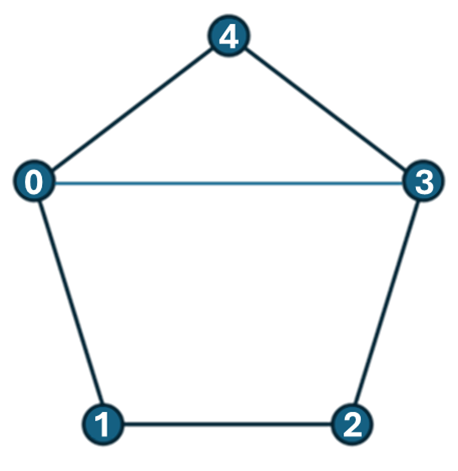

We can use a single *Qbin* variable *vertices* with five q-bits to solve a house shaped vertices identification problem that was discussed in chapter 3.1. when we used five *Qbit* variables to define the problem. Considering that a *Qbin* variable q-bit sequence starts with the right most q-bit 0, we have identified the house vertices with the numbers in the range 0 to 4.

In [10]:
vertices = Qbin(5, "v's")
vIdentified = Qbit("vI", 1)

roof = vIdentified.assign(((vertices[0] ^ vertices[3])| (vertices[0] ^ vertices[4])) & vertices[0].alike(vertices[3]).alike(vertices[4]))
walls = vIdentified.assign(((vertices[1] ^ vertices[0]) & (vertices[1] ^ vertices[2])) | ((vertices[2] ^ vertices[1]) & (vertices[2] ^ vertices[3])))

from dann5.d5 import Qblock
houseBlock = Qblock() << walls << roof
print(houseBlock)

Solver.Activate('dann5')

evaluations = houseBlock.compute()
vertices.add(evaluations)

print("House vertices identification problem solutions are:")
for atEvltn in range(len(evaluations)):
    print(vertices.solution(atEvltn))
vertices.reset()

{
	vI\1\ = (((v's1\S\ ^ v's0\S\) & (v's1\S\ ^ v's2\S\)) | ((v's2\S\ ^ v's1\S\) & (v's2\S\ ^ v's3\S\)));
	vI\1\ = (((v's0\S\ ^ v's3\S\) | (v's0\S\ ^ v's4\S\)) & ((v's0\S\ !^ v's3\S\) !^ v's4\S\));
}
House vertices identification problem solutions are:
v's\5b:01010\
v's\5b:00101\
v's\5b:10100\
v's\5b:10010\


As in chapter 3.1., the solutions set has four valid solutions, identifying following vertices pairs as those that do not share a common edge:
> vertices 1 and 3
>
> vertices 0 and 2
>
> vertices 2 and 4
>
> vertices 1 and 4

## Solving Seven antennas interference problem

In the previous chapter we have solved the problem called the Antennas Selection issue using *Qbool* type. Here we are going to see how to use *Qbin* type to solve the same problem.

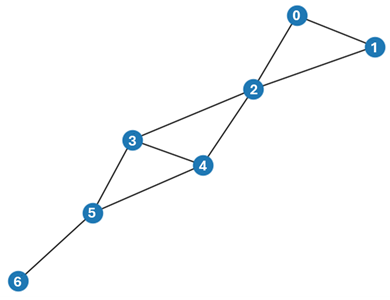

As reminder looking at the image above we see 7 antennas and we need to see all possible selections of which to turn on so that they do not interfere with each other while maximizing coverage. Any antenna (vertex) that is connected with a line (edge) will interfere with one another. For example, in the figure above, if both antenna 1 and 2 are on there will be an interference.

This time we will initialize a *Qbin* variable *antennas* with 7 q-bits as *unknown*, meaning all its q-bits in *superposition* state. Also, we will initialize Qbit variable *antennaOn* to be 1.

In [13]:
antennas = Qbin(7, "antennas");
antennaOn = Qbit("antennaOn", 1)

print(antennas, antennas.toString(True), antennaOn)

antennas\7q:U\ antennas\7q:antennas6\S\;antennas5\S\;antennas4\S\;antennas3\S\;antennas2\S\;antennas1\S\;antennas0\S\;\ antennaOn\1\


Based on the configuration of antennas, we have concluded the following rules:

    1. antenna 7 has to be always on to ensure a condition of the maximum number of antennas being on
    2. antennas 3 and 6 have to be in the same state, while antenna 6 has to be different than antenna 7
    3. antennas 1 and 2 have to be in different state
    4. antennas 4 and 5 have to be in different state
    
In the following code example we see that the quantum expression, which formulates the above rules, is not too complex. Thus, we will use the *dann5* quantum simulator (*Solver.Activate('dann5')*) to calculate all the possible solutions.

In [14]:
expression7 = (antennas[6] == antennaOn) & (antennas[5] ^ antennas[6])  & antennas[2].alike(antennas[5]) & (antennas[0] ^ antennas[1]) & (antennas[3] ^ antennas[4])
assignment7 = antennaOn.assign(expression7)

evaluations = assignment7.compute()
antennas.add(evaluations)

print("Antennas interference problem solutions are:")
for evltnIn in range(len(evaluations)):
    print(antennas.solution(evltnIn))
antennas.reset()

Solutions for  antennas\7b:1010010\
Solutions for  antennas\7b:1001010\
Solutions for  antennas\7b:1010001\
Solutions for  antennas\7b:1001001\


Like previously, there are four solutions. In each one value 1 indicates the antenna being on.